# Part I - FordGobike system exploration
## by Tina RAZAFINDRAKOTO

## Introduction
The dataset that will be processed in this project concerns data from the FordGobike system. This dataset includes information about individual trips taken in a bike share system covering the greater San Francisco Bay Area.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
gobike = pd.read_csv("201902-fordgobike-tripdata.csv")
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


### What is the structure of your dataset?

> this set of data includes 16 columns and 183412 rows that containt float, integer and object values 

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in this dataset are:
    - relation with duration, the member information, and the station information 
    

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features of the dataset that can help in the investigation are the following elements:
    - start_time
    - end_time
    - start_station_latitude
    - start_station_longitude
    - end_station_latitude
    - end_station_latitude

- the duration of the path and the dates are not of type dates : start_time , end_time,
- the columns start_station_id and end_station_id are not integer type
- the columns usr_type consists of only 2 distinct values but is of type object
- the columns member_gender consists of only 3 distinct values but is of type object
- column birth_year is of type float
- column bike_share_for_all_trip consists of only 2 distinct values but is of type object
- Some columns related to station information have null values
- Some columns related to member information have null values
- Some person are too old

In [23]:
# Making a copy of the dataset
gobike_copy = gobike.copy()

In [24]:
# check gender values
gobike_copy['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [25]:
# check bike_share_for_all_trip values
gobike_copy['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [26]:
# check for duplicated value
gobike_copy.duplicated().value_counts()

False    183412
dtype: int64

In [27]:
# check for member information with null values
na_member = gobike_copy[gobike_copy['member_birth_year'].isna()]
na_member

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
147,372,2019-02-28 22:46:19.1140,2019-02-28 22:52:31.4770,369.0,Hyde St at Post St,37.787349,-122.416651,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2191,Customer,NaN,NaN,No
176,730,2019-02-28 22:28:50.5140,2019-02-28 22:41:00.8970,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,258.0,University Ave at Oxford St,37.872355,-122.266447,4784,Customer,NaN,NaN,No
220,1425,2019-02-28 22:05:25.5530,2019-02-28 22:29:11.1180,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,109.0,17th St at Valencia St,37.763316,-122.421904,6525,Subscriber,NaN,NaN,No
266,1302,2019-02-28 21:53:13.2740,2019-02-28 22:14:56.1730,181.0,Grand Ave at Webster St,37.811377,-122.265192,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,2471,Customer,NaN,NaN,No
292,1468,2019-02-28 21:43:04.3630,2019-02-28 22:07:32.6640,321.0,5th St at Folsom,37.780146,-122.403071,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,6040,Customer,NaN,NaN,No


In [28]:
# delete row with member information which have null values

gobike_copy = gobike_copy.drop(na_member.index)

In [29]:
# check for station_information with null values
na_station = gobike_copy[gobike_copy['start_station_id'].isna()]
na_station

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
6214,1334,2019-02-28 10:32:47.9300,2019-02-28 10:55:02.0280,NaN,NaN,37.40,-121.93,NaN,NaN,37.38,-121.93,4150,Customer,1990.0,Male,No
8499,240,2019-02-28 08:23:07.0920,2019-02-28 08:27:07.2890,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
8783,883,2019-02-28 07:58:07.3720,2019-02-28 08:12:51.2760,NaN,NaN,37.41,-121.96,NaN,NaN,37.40,-121.94,4211,Subscriber,1980.0,Male,No
10967,116,2019-02-27 19:25:57.0360,2019-02-27 19:27:54.0260,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
11071,828,2019-02-27 19:03:14.6380,2019-02-27 19:17:03.4340,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4091,Subscriber,1980.0,Male,No


In [30]:
# delete row with station information which have null values
gobike_copy = gobike_copy.drop(na_station.index)

In [31]:
#the duration of the path and the dates are not of type dates : start_time , end_time,

gobike_copy['start_time'] = pd.to_datetime(gobike_copy['start_time'])
gobike_copy['end_time'] = pd.to_datetime(gobike_copy['end_time'])

In [32]:
#the columns start_station_id and end_station_id are not integer type

gobike_copy['start_station_id'] = gobike_copy['start_station_id'].astype(int)
gobike_copy['end_station_id'] = gobike_copy['end_station_id'].astype(int)

In [33]:
#the columns usr_type consists of only 2 distinct values but is of type object

gobike_copy['user_type'] = gobike_copy['user_type'].astype('category')

In [34]:
#the columns member_gender consists of only 3 distinct values but is of type object

gobike_copy['member_gender'] = gobike_copy['member_gender'].astype('category')

In [35]:
#column bike_share_for_all_trip consists of only 2 distinct values but is of type object

gobike_copy['bike_share_for_all_trip'] = gobike_copy['bike_share_for_all_trip'].astype('category')

In [36]:
#column birth_year is of type float

gobike_copy['member_birth_year'] = gobike_copy['member_birth_year'].astype('int')

In [37]:
gobike_copy['member_age'] = 2019 - gobike['member_birth_year']

In [38]:
gobike_copy['member_age'] = gobike_copy['member_age'].astype(int)

In [39]:
gobike_copy['duration_min'] = gobike_copy['duration_sec']/60

In [40]:
# filter person with age < 80
gobike_copy = gobike_copy[gobike_copy['member_age']<=80]

## Univariate Exploration


#### 1 ) how is the frequency of bike use by gender?

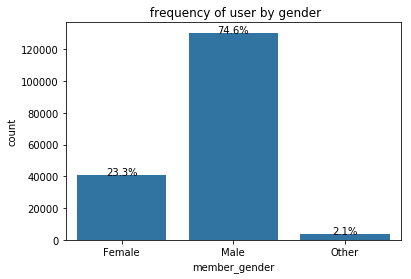

In [41]:
base_color = sb.color_palette()[0]
sb.countplot(data=gobike_copy, x='member_gender', color=base_color);
n_gender = gobike_copy.shape[0]

# Recalculate type_counts
type_counts = gobike_copy['member_gender'].value_counts()

# Get current tick locations and labels
locs, labels = plt.xticks(rotation=0)

# Loop on each pair of slots and labels
for loc, label in zip(locs, labels):
    # retrieve the text property of the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_gender)
    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    plt.title(" frequency of user by gender")

- As shown in the bar graph above, 74.6% of the people who use biike are men, 23.3% are women, and 2.3% are other genders

#### 2) how is the frequency of bike use by gender (using pie plot)

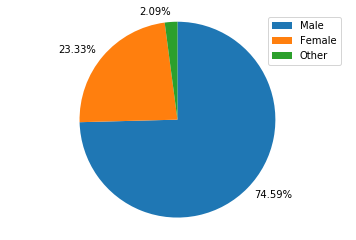

In [42]:
#get the category of gender
sedan_classes = ['Male', 'Female', 'Other']

# calculate the labes values into %
labels = (gobike_copy['member_gender'].value_counts()/n_gender*100).round(2).astype(str)+'%'

# get the pie chart with the informations to include with
sorted_counts =  gobike_copy['member_gender'].value_counts()
patches, texts = plt.pie(sorted_counts/n_gender, labels =labels ,startangle = 90, counterclock = False);
plt.legend(patches,sedan_classes)
plt.axis('equal');

- As shown in the bar graph above, 74.6% of the people who use biike share are men, 23.3% are women, and 2.3% are other genders. The pie chart is also suitable due to the fact that there are only 3 gender listed

#### 3) how the use of velo by subscriber and customers is divided?

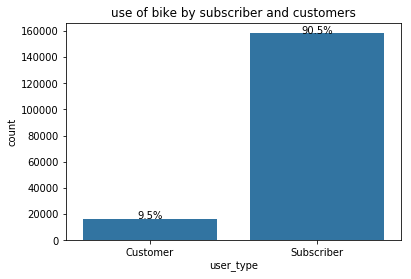

In [43]:
base_color = sb.color_palette()[0]
sb.countplot(data=gobike_copy, x='user_type', color=base_color);
n_gender = gobike_copy.shape[0]

# Recalculate type_counts
type_counts = gobike_copy['user_type'].value_counts()

# Get current tick locations and labels
locs, labels = plt.xticks(rotation=0)

# Loop on each pair of slots and labels
for loc, label in zip(locs, labels):
    # retrieve the text property of the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_gender)
    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    plt.title('use of bike by subscriber and customers')

As shown in the bar graph above, 90.5% of the people who use biike share are subscriber, 9.5% only are customer, 

#### 4 ) how the use of velo by subscriber and customers is divided? (using pie plot)

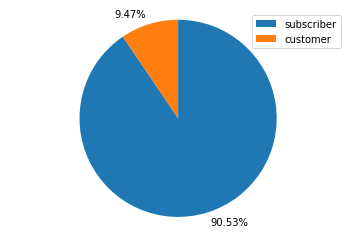

In [44]:
#get the category of user_tpye
sedan_classes = ['subscriber', 'customer']

# calculate the labes values into %
labels = (gobike_copy['user_type'].value_counts()/n_gender*100).round(2).astype(str)+'%'

# get the pie chart with the informations to include with
sorted_counts =  gobike_copy['user_type'].value_counts()
patches, texts = plt.pie(sorted_counts/n_gender, labels =labels ,startangle = 90, counterclock = False);
plt.legend(patches,sedan_classes)
plt.axis('equal');

#### 5) the age frequency of using bike per age


In [45]:
gobike_copy['member_age'].describe()

count    174760.000000
mean         34.125223
std           9.877739
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          80.000000
Name: member_age, dtype: float64

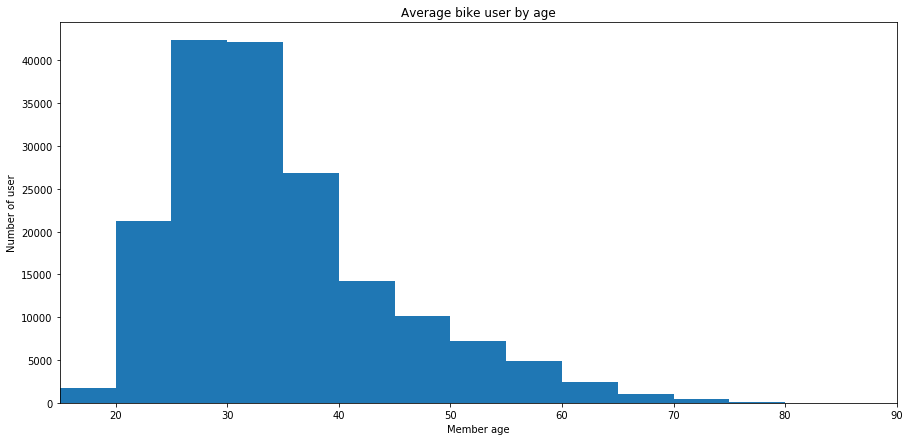

In [46]:
plt.figure(figsize = [15,7]) 
max_age = gobike_copy['member_age'].max()

bins = np.arange(15, max_age+10, 5)
plt.hist(data=gobike_copy, x='member_age', bins= bins)
#Abscisse
plt.xlim(15,90)
plt.xlabel('Member age');
plt.title('Average bike user by age');
plt.ylabel('Number of user');

there is approximatively a maximum of 40000 user for age average of 34 years old

#### 6) what is the average of using bike per second?

In [47]:
gobike_copy['duration_sec'].describe()

count    174760.000000
mean        704.309630
std        1643.031657
min          61.000000
25%         323.000000
50%         511.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

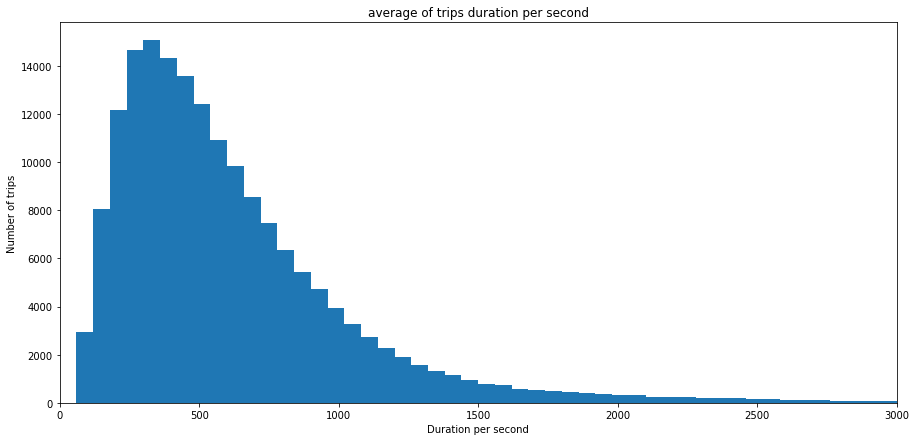

In [48]:
plt.figure(figsize = [15,7]) 
max_duration = gobike_copy['duration_sec'].max()
bins = np.arange(0, max_duration, 60)
plt.hist(data=gobike_copy, x='duration_sec', bins= bins)
plt.xlim(0,3000)
plt.xlabel('Duration per second');
plt.title('average of trips duration per second')
plt.ylabel('Number of trips');

there is approximatively a maximum of 14000 bike trips for an average of 704 second

#### 7) what is the average of using bike per min?

In [50]:
gobike_copy['duration_min'].describe()

count    174760.000000
mean         11.738494
std          27.383861
min           1.016667
25%           5.383333
50%           8.516667
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

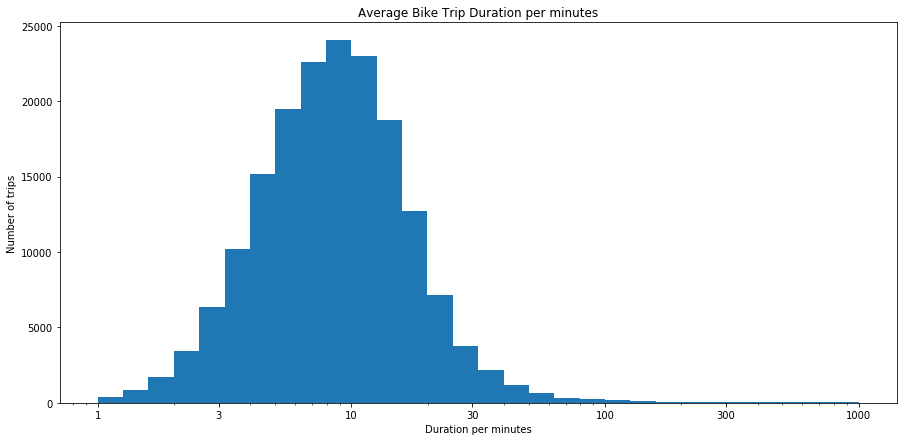

In [51]:
plt.figure(figsize = [15,7]) 
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
plt.hist(data = gobike_copy , x = 'duration_min' , bins = bins);
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration per minutes');
plt.title('Average Bike Trip Duration per minutes');
plt.ylabel('Number of trips');

the majority of trips are around 1 to 30 minutes with a peak around 10 minutes

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- peaks of value have been recorded on a duration of use of the bikes at about 10mn. 
- The graph also allowed us to see that there are people who have ages that are not coherent because the outliers showed maximum ages of 140 years, which is not possible


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- I changed the duration in seconds by time in minutes to be able to recover the peak in the time of use of the bikes.
- A filter on the age of the persons has been made so that the maximum age is 80

## Bivariate Exploration
.

#### 8) Is there a relationship betweenbike_share_for_all_trip and member_ager?

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Text(0.5,1,' frequency of using bike per age')

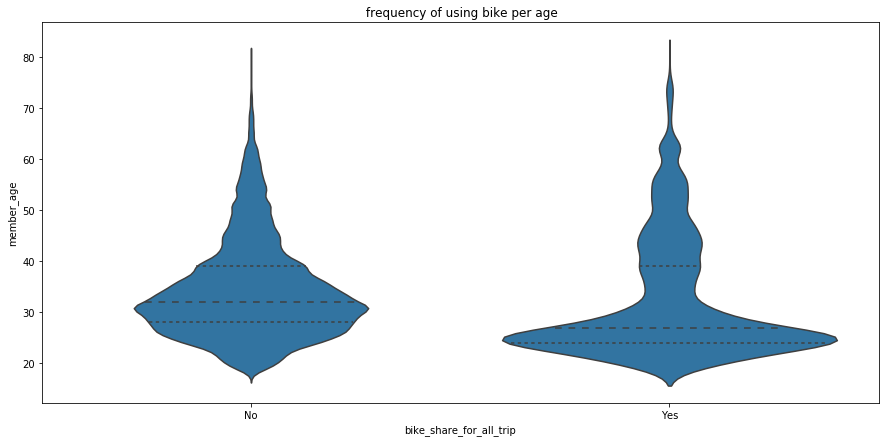

In [53]:
plt.figure(figsize = [15,7]) 
base_color = sb.color_palette()[0]
sb.violinplot(data=gobike_copy, x='bike_share_for_all_trip', y='member_age',color=base_color,inner='quartile'); 
plt.title(' frequency of using bike per age')

- the graph shows us that young people between 20 and 30 years old are the ones who use bike_share_for_all_trip the most
- this graph also allowed us to see that there are people who have ages that are not coherent because the outliers showed maximum ages of 140 years, which is not possible 

#### 9) Is there any relationship between trip duration in min and bike_share_for_all_tripr?

Text(0.5,1,'trip duration in min and the bike_share_for_all_trip')

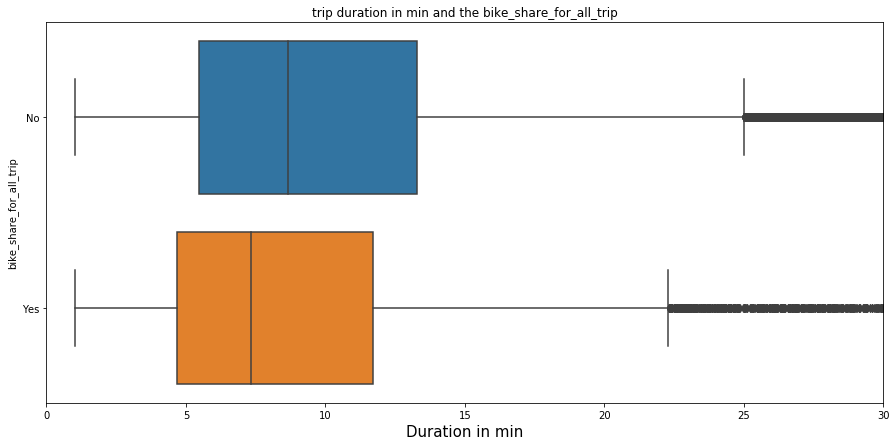

In [54]:
plt.figure(figsize = [15,7]) 
sb.boxplot(data=gobike_copy,x='duration_min',y='bike_share_for_all_trip')

plt.xlabel("Duration in min",size=15)
plt.xlim(0,30)
plt.title('trip duration in min and the bike_share_for_all_trip')

this graph shows a slight difference between the duration of use which tends towards the use of bikes that are not, but which is not really relevant

#### 10) Is there any relationship between trip duration in min and the member_gender?


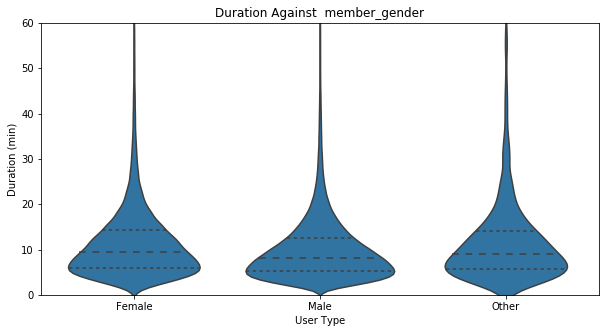

In [55]:
# plot relationship between member gender and duration
plt.figure(figsize = [10,5]) 

duration_min = gobike_copy.query("duration_min < 60")
base_color = sb.color_palette()[0]
sb.violinplot(data=duration_min, x='member_gender', y='duration_min', color=base_color, inner='quartile')
plt.xlabel('User Type')
plt.ylim(0,60)

plt.ylabel('Duration (min)')
plt.title('Duration Against  member_gender');

Each gender uses the bicycle at about the same average time, which may mean that the distances between the starting and finishing points are not very far.

#### 11) is there a relation between the start_station and the end_station


Text(0,0.5,'end_station')

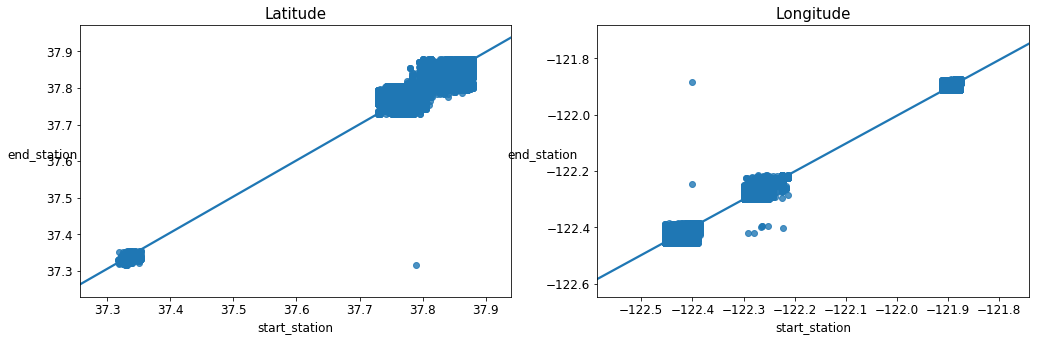

In [56]:
plt.figure(figsize = [17,5]) 
plt.rcParams['font.size'] = 12

plt.subplot(1, 2, 1)
sb.regplot(data=gobike_copy, x='start_station_latitude',y='end_station_latitude',fit_reg=True)
plt.title("Latitude",size=15)
plt.xlabel("start_station",size=12)
plt.ylabel("end_station",size=12,rotation=0)

plt.subplot(1, 2, 2)
sb.regplot(data=gobike_copy, x='start_station_longitude',y='end_station_longitude',fit_reg=True)
plt.title("Longitude",size=15)
plt.xlabel("start_station",size=12, rotation=0)
plt.ylabel("end_station",size=12,rotation=0)

There is a strong relationship between the start_station and the end_station and we can also see a dispersion of stations in 3 different areas 

#### 12 ) Relation with age and duration min

Text(0.5,1,'Duration Against User Age')

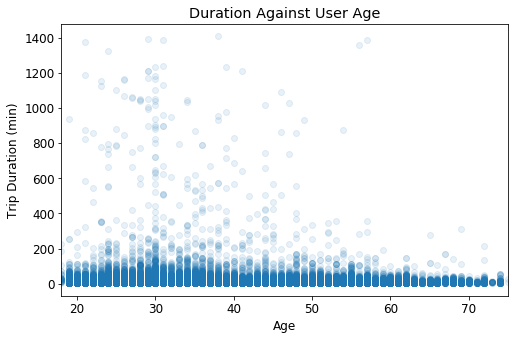

In [57]:
# scatter plot of duration vs. age
plt.figure(figsize = [8, 5])
plt.scatter(data = gobike_copy, x = 'member_age', y = 'duration_min', alpha = 1/10)
plt.xlabel('Age')
plt.xlim(18, 75)
plt.ylabel('Trip Duration (min)')
plt.title('Duration Against User Age')

we can see that the travel time for each age group is more or less identical

#### 13 ) Number of bike use by each gender according to the type of bike

Text(0.5,1,'Number of bike use by each gender according to the type of bike')

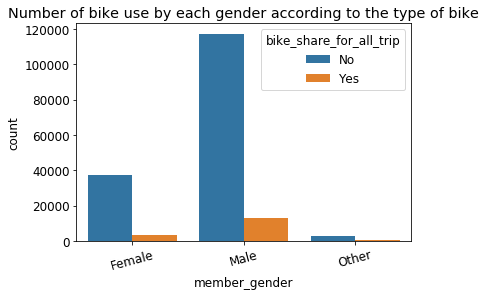

In [60]:
sb.countplot(data = gobike_copy, x = 'member_gender', hue = 'bike_share_for_all_trip')
plt.xticks(rotation=15)
plt.title('Number of bike use by each gender according to the type of bike')

We can observe that the bike_share_for all_trip are not really appreciated by everyone 

#### 14 ) Average of duration by age

Text(0,0.5,'Avg. of duration in min')

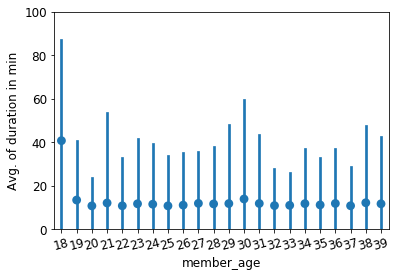

In [61]:
age_mean = gobike_copy.query("member_age < 40")
sb.pointplot(data=age_mean, x='member_age', y='duration_min', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=15);
plt.ylim(0,100)
plt.ylabel('Avg. of duration in min')

We can see here that it is the 18 year olds who spend the most mean time on bike

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- young people between 20 and 30 years old are the ones who use bike_share_for_all_trip the most
- Each gender uses the bicycle at about the same average time, which may mean that the distances between the starting and finishing points are not very far.

### Were there any interesting or surprising interactions between features?


- according to latitude and longitude of the stations, stations are divided in 3 different areass
- 18 year olds spend the most time on bikes on average

## Multivariate Exploration


#### 15) distribution of trips by gender and age

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

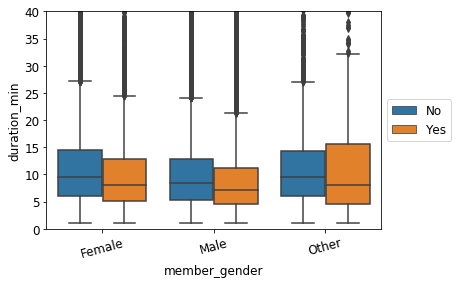

In [63]:
sedan_classes = ['Male', 'Female','Other']
member_genre = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)

gobike_copy['member_genre'] = gobike_copy['member_gender'].astype(member_genre)
plt.ylim(0,40)

# traçage
sb.boxplot(data = gobike_copy, x = 'member_gender', y = 'duration_min', hue = 'bike_share_for_all_trip')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15)


- men tend to use bikes less than women and other genders
- other genders use more bike_share_for_all_trip  


## Conclusions
- despite the fact that men make up more than 50% of the population, it is women and people of other genders who spend more time on bikes
- Since most of the travel times are quite short, we can conclude that the distance between the sites is not very far